# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

temp = []
humidity = []
cloudiness = []
wind = []
lat = []
used_cities = []

for city in cities:
        response = requests.get(query_url + city).json()
        try:
            temp.append(response["main"]["temp_max"])
            humidity.append(response["main"]["humidity"])
            cloudiness.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"])
            lat.append(response["coord"]["lat"])
            used_cities.append(response["name"])
            print(f"Processing {city}")
        except :
            print(f"{city} not found.")

Processing hamilton
Processing upernavik
Processing bambous virieux
Processing calama
Processing port alfred
Processing albany
mankovo-kalitvenskoye not found.
Processing leningradskiy
Processing cherskiy
Processing busselton
Processing roald
Processing carnarvon
Processing ponta do sol
illoqqortoormiut not found.
Processing bangkalan
Processing tuatapere
Processing cape town
marcona not found.
Processing zhezkazgan
Processing isangel
Processing zverinogolovskoye
Processing dunedin
korla not found.
Processing vaini
Processing kapaa
Processing tasiilaq
Processing airai
Processing katsuura
Processing paamiut
Processing nanakuli
Processing chernogorsk
Processing bluff
Processing karasjok
Processing ternate
Processing okhotsk
Processing brekstad
Processing qaanaaq
Processing sirur
Processing charters towers
Processing rikitea
Processing bethel
Processing srednekolymsk
Processing sumenep
Processing saint-philippe
Processing kavaratti
tir pol not found.
Processing mogadishu
Processing mataur

Processing yantal
Processing baijiantan
Processing ilulissat
Processing marawi
Processing yuzhou
Processing effium
Processing gat
Processing ust-tsilma
Processing yatou
Processing orje
Processing san jose
Processing praia da vitoria
Processing luwuk
Processing dano
Processing bridlington
Processing te karaka
Processing lasa
Processing jalu
Processing dukat
porto santo not found.
grand river south east not found.
Processing knysna
Processing vega de alatorre
Processing troitsko-pechorsk
Processing shingu
kuche not found.
kaya not found.
Processing kalmunai
Processing dickson
Processing fallon
Processing north bend
Processing kavieng
Processing hanna
Processing mislinja
Processing matagami
Processing broome
Processing sept-iles
Processing galle
Processing port lincoln
Processing santa cruz
Processing dudinka
Processing mbekenyera
Processing zyryanka
Processing show low
Processing alihe
Processing chicama
Processing kherson
Processing avera
Processing hisor
Processing san-pedro
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": used_cities,
    "Lat": lat,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Max Temp,Humidity,Cloudiness,Wind
0,Hamilton,32.30,60.80,72,75,6.93
1,Upernavik,72.79,-6.55,100,32,8.77
2,Bambous Virieux,-20.34,84.20,70,40,11.41
3,Calama,-22.46,51.80,62,0,9.17
4,Port Alfred,-33.59,69.32,84,0,8.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

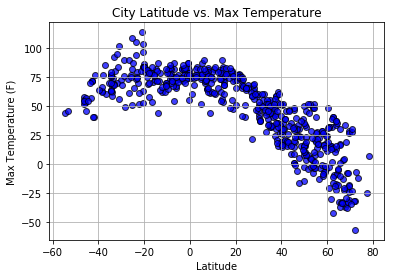

In [5]:
plt.scatter(lat, temp, marker="o", c='b', alpha=0.75, edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

#### Latitude vs. Humidity Plot

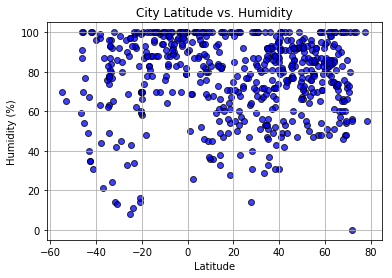

In [6]:
plt.scatter(lat, humidity, marker="o", c='b', alpha=0.75, edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

#### Latitude vs. Cloudiness Plot

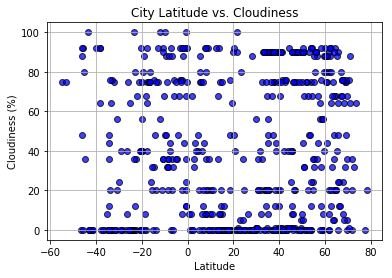

In [7]:
plt.scatter(lat, cloudiness, marker="o", c='b', alpha=0.75, edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

#### Latitude vs. Wind Speed Plot

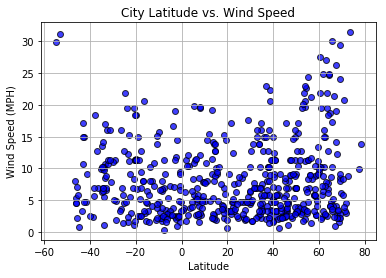

In [8]:
plt.scatter(lat, wind, marker="o", c='b', alpha=0.75, edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.show()